In [ ]:
from eval.trainVAE import VAEEval
v = VAEEval()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN,Birch
from sklearn.metrics import calinski_harabasz_score

In [ ]:
fe = v.feature_extractor
data = v.data_set.ext_df.tolist()
_pred = v.data_set.tag_ids.tolist()
ori = v.data_set.ori_df

In [ ]:
v.data_set.ori_df.iloc[0,2]

In [ ]:
v.data_set.raw_ids

In [ ]:
v.query_ext([v.data_set.pos[1][0]])

In [ ]:
v.data_set.ext_df

In [5]:
v.train()

epoch:6,loss:38124560.0
epoch:7,loss:38124560.0
epoch:8,loss:38124560.0
epoch:9,loss:38124560.0
epoch:10,loss:38124560.0
tensor(43.5836, device='cuda:0', grad_fn=<SumBackward0>)
epoch:11,loss:38124560.0
epoch:12,loss:38124560.0
epoch:13,loss:38124560.0
epoch:14,loss:38124560.0
epoch:15,loss:38124560.0
epoch:16,loss:38124560.0
epoch:17,loss:38124560.0
epoch:18,loss:38124560.0
epoch:19,loss:38124560.0
epoch:20,loss:38124560.0
tensor(46.0274, device='cuda:0', grad_fn=<SumBackward0>)
epoch:21,loss:38124560.0
epoch:22,loss:38124560.0
epoch:23,loss:38124560.0
epoch:24,loss:38124559.5
epoch:25,loss:38124559.5
epoch:26,loss:38124559.5
epoch:27,loss:38124559.5
epoch:28,loss:38124559.5
epoch:29,loss:38124559.5


In [6]:
# fe = t.vae
# _,theta,*_ = fe(data,pred=_pred)
_,theta,*_ = fe(data)

In [7]:
def do_tsne(X):
    tsne = TSNE(n_components=2)
    new_x = tsne.fit_transform(X)
    return new_x,tsne

In [8]:
t,tsne = do_tsne(theta.cpu().detach())

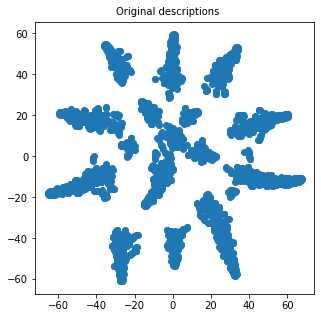

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'Original descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1])
fig.show()

In [ ]:
from sklearn.cluster import KMeans,DBSCAN
km = KMeans()
db = DBSCAN()

In [ ]:
r1 = km.fit_predict(t)
r2 = db.fit_predict(theta.cpu().detach())

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'Original descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1],c=r1)

fig.show()

In [ ]:
ori[r1==1]

In [ ]:
from eval.TagLSTMEval_topic import LSTMEval
model = LSTMEval()

In [ ]:
model.train()

In [ ]:
torch.autograd.set_grad_enabled(False)

for id1,id2,l in model.train_data_loader:
    break
in1 = model.get_BoWs(id1)    
in2 = model.ext_df[id2]
text2 = model.data_set[id2]

In [ ]:
positives = torch.sort(l,descending=True)[1]

In [ ]:
import torch
f1,w1 = model.feature_extractor([torch.LongTensor(s) for s in id1],in1,model.vae)

In [ ]:
k = positives[2].item()
w1[k]

In [ ]:
[model.di.id2token[_i] for _i in id1[k]]

In [ ]:
f2,w2 = model.feature_extractor(text2,in2,model.vae)

In [ ]:
[model.di.id2token[_i] for _i in text2.iloc[k].numpy().tolist()]

In [ ]:
word_mask = (w2[k]>0.5).squeeze()[:len(text2.iloc[k])]

In [ ]:
[model.di.id2token[_i] for _i in text2.iloc[k][word_mask].numpy().tolist()]

In [ ]:
model.cos(f1,f2)[k]

In [ ]:
for id1 in model.test_keys:
    break
pos = list(model.data_set.pos[id1][1])
text_bow = model.get_BoWs([model.data_set.pos[id1][0]])
text = [torch.LongTensor(model.data_set.pos[id1][0])]

In [ ]:
[model.di.id2token[_i] for _i in text[0].numpy()]

In [ ]:
all_f = []
for _ids in model.ids_loader:
    _t = model.data_set[_ids.cpu().numpy()]
#   _b = self.bow[_ids.cpu().numpy()]
    _b = model.ext_df[_ids.cpu().numpy()]
    _f,*_ = model.feature_extractor(_t,_b,model.vae)

    all_f.append(_f.cpu())
all_f = torch.cat(all_f,dim = 0).view(len(model.data_set),-1)

In [ ]:
torch.cuda.empty_cache()